In [6]:
import nibabel as nib
from nibabel.freesurfer.io import read_geometry 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import utils as ut
import porespy as ps

In [2]:
# Freesurfer label mapping
index_to_label = {}
with open('FreeSurferColorLUT.txt', 'r') as file:
    for line in file:
        # comments or empty
        if line.startswith('#') or not line.strip():
            continue

        parts = line.split()
        index = int(parts[0])
        label_name = ' '.join(parts[1:-4])
        index_to_label[index] = label_name

In [3]:
index_to_label

{0: 'Unknown',
 1: 'Left-Cerebral-Exterior',
 2: 'Left-Cerebral-White-Matter',
 3: 'Left-Cerebral-Cortex',
 4: 'Left-Lateral-Ventricle',
 5: 'Left-Inf-Lat-Vent',
 6: 'Left-Cerebellum-Exterior',
 7: 'Left-Cerebellum-White-Matter',
 8: 'Left-Cerebellum-Cortex',
 9: 'Left-Thalamus-unused',
 10: 'Left-Thalamus',
 11: 'Left-Caudate',
 12: 'Left-Putamen',
 13: 'Left-Pallidum',
 14: '3rd-Ventricle',
 15: '4th-Ventricle',
 16: 'Brain-Stem',
 17: 'Left-Hippocampus',
 18: 'Left-Amygdala',
 19: 'Left-Insula',
 20: 'Left-Operculum',
 21: 'Line-1',
 22: 'Line-2',
 23: 'Line-3',
 24: 'CSF',
 25: 'Left-Lesion',
 26: 'Left-Accumbens-area',
 27: 'Left-Substancia-Nigra',
 28: 'Left-VentralDC',
 29: 'Left-undetermined',
 30: 'Left-vessel',
 31: 'Left-choroid-plexus',
 32: 'Left-F3orb',
 33: 'Left-aOg',
 34: 'Left-WMCrowns',
 35: 'Left-mOg',
 36: 'Left-pOg',
 37: 'Left-Stellate',
 38: 'Left-Porg',
 39: 'Left-Aorg',
 40: 'Right-Cerebral-Exterior',
 41: 'Right-Cerebral-White-Matter',
 42: 'Right-Cerebral-Co

In [4]:
img = nib.load('sample/segmented_0.nii.gz')
array = img.get_fdata()
array.shape # note that the segmentation is smaller in volume

(101, 137, 109)

In [5]:
present_labels = np.unique(array)
# len(present_labels)
print("Detected labels :")
for i, lbl in enumerate(present_labels):
    label_name = index_to_label.get(lbl, 'Unknown')
    print(f"{int(lbl)}: {label_name}")
print(f"Detected {len(present_labels)} labels")

Detected labels :
0: Unknown
2: Left-Cerebral-White-Matter
3: Left-Cerebral-Cortex
4: Left-Lateral-Ventricle
5: Left-Inf-Lat-Vent
7: Left-Cerebellum-White-Matter
8: Left-Cerebellum-Cortex
10: Left-Thalamus
11: Left-Caudate
12: Left-Putamen
13: Left-Pallidum
14: 3rd-Ventricle
15: 4th-Ventricle
16: Brain-Stem
17: Left-Hippocampus
18: Left-Amygdala
24: CSF
26: Left-Accumbens-area
28: Left-VentralDC
41: Right-Cerebral-White-Matter
42: Right-Cerebral-Cortex
43: Right-Lateral-Ventricle
44: Right-Inf-Lat-Vent
46: Right-Cerebellum-White-Matter
47: Right-Cerebellum-Cortex
49: Right-Thalamus
50: Right-Caudate
51: Right-Putamen
52: Right-Pallidum
53: Right-Hippocampus
54: Right-Amygdala
58: Right-Accumbens-area
60: Right-VentralDC
Detected 33 labels


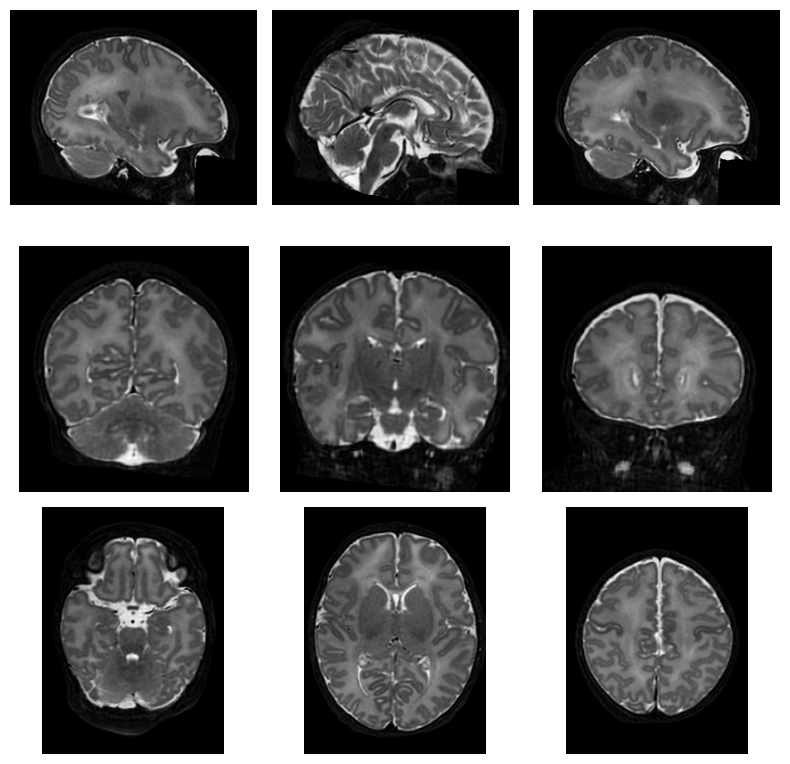

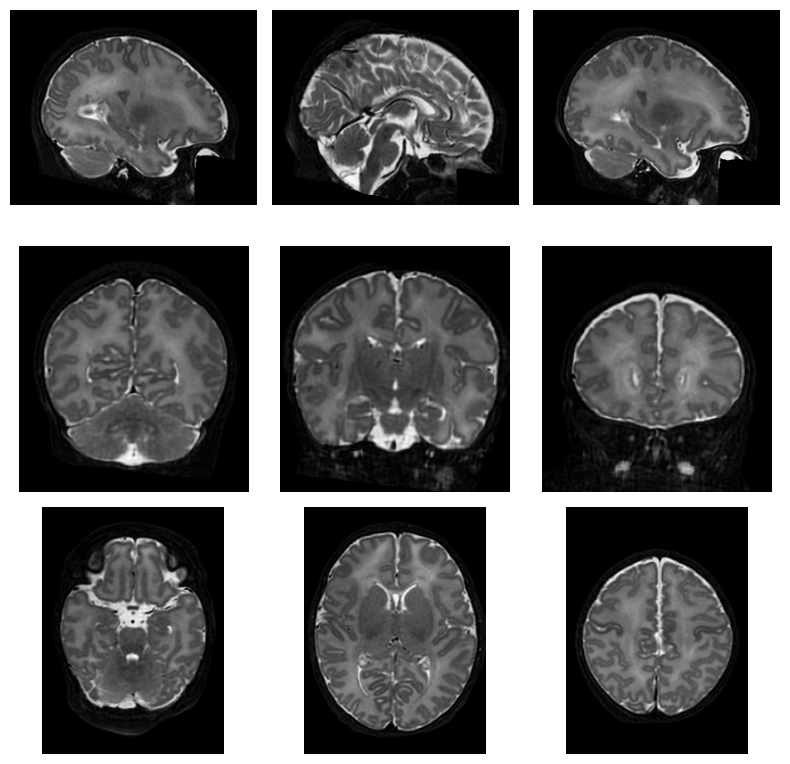

In [7]:
ut.visualize_nifti_depth("./sample/registered_0.nii.gz")

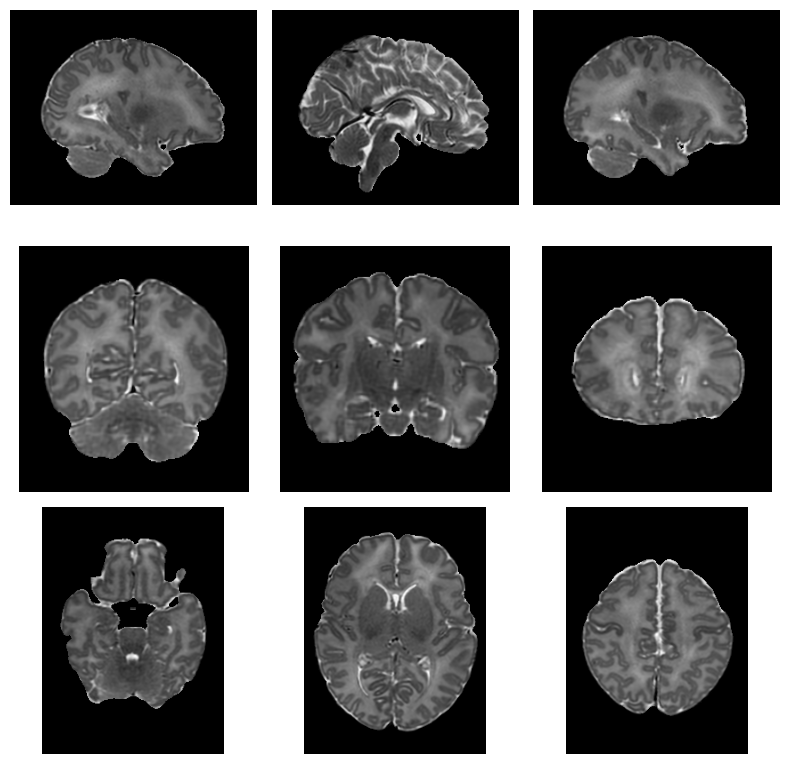

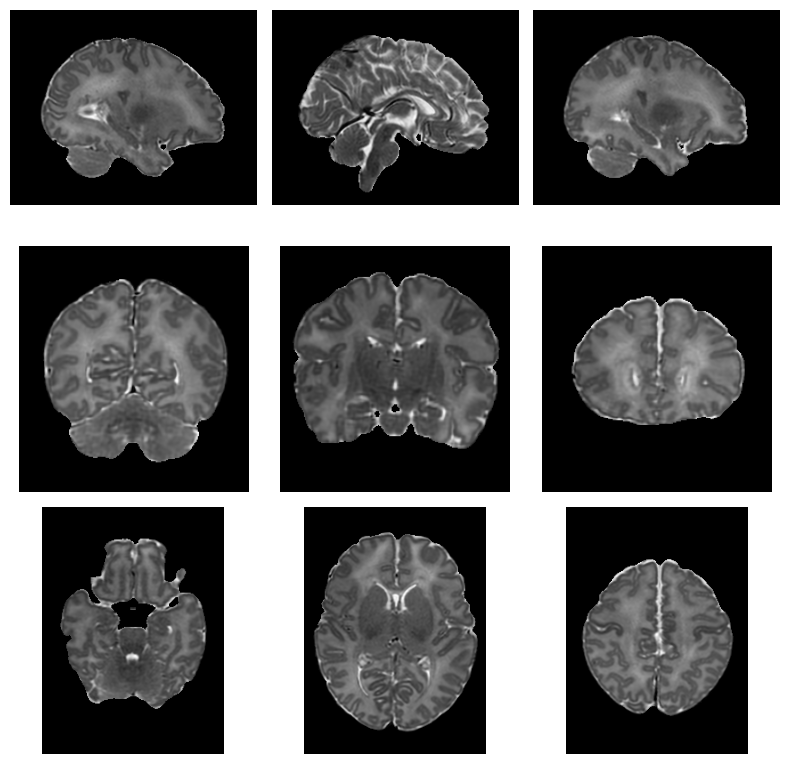

In [6]:
ut.visualize_nifti_depth('sample/brain_0.nii.gz')

## Marzi FD

In [7]:
files = [
    'sample/registered_0.nii.gz',
    'sample/brain_0.nii.gz',
    'sample/segmented_0.nii.gz',
]

description = [
    'Registered Brain',
    'Brain',
    'Segmented Brain'
]

In [ ]:
results = []

for file in files:
    fd, (mfs, Mfs), fd_results = ut.fractal_analysis(file, verbose=False)
    results.append({
        'file': file,
        'FD': fd,
        'min_box_size': mfs,
        'max_box_size': Mfs,
        'fd_results': fd_results
    })

df_results = pd.DataFrame(results)
df_results['description'] = description

FD automatically selected: 2.8955
FD automatically selected: 2.8651
FD automatically selected: 2.7592


In [24]:
df_results[['description', 'FD', 'min_box_size', 'max_box_size']]

,description,FD,min_box_size,max_box_size
0,Registered Brain,2.8955,0.5,8.0
1,Brain,2.8651,0.5,8.0
2,Segmented Brain,2.7592,1.0,16.0


In [25]:
df_expanded = df_results.explode('fd_results')
fd_details = pd.json_normalize(df_expanded['fd_results'])
fd_details.rename(columns={'FD': 'fd_local'}, inplace=True)
df_fd = pd.concat([df_expanded.drop(columns=['fd_results']).reset_index(drop=True), fd_details], axis=1)
df_fd.head()

,file,FD,min_box_size,max_box_size,description,fd_local,R2_adj,scale_min,scale_max
0,sample/registered_0.nii.gz,2.8955,0.5,8.0,Registered Brain,2.3804,0.979,0.5,256.0
1,sample/registered_0.nii.gz,2.8955,0.5,8.0,Registered Brain,2.5355,0.989,0.5,128.0
2,sample/registered_0.nii.gz,2.8955,0.5,8.0,Registered Brain,2.2827,0.976,1.0,256.0
3,sample/registered_0.nii.gz,2.8955,0.5,8.0,Registered Brain,2.6643,0.995,0.5,64.0
4,sample/registered_0.nii.gz,2.8955,0.5,8.0,Registered Brain,2.4541,0.988,1.0,128.0


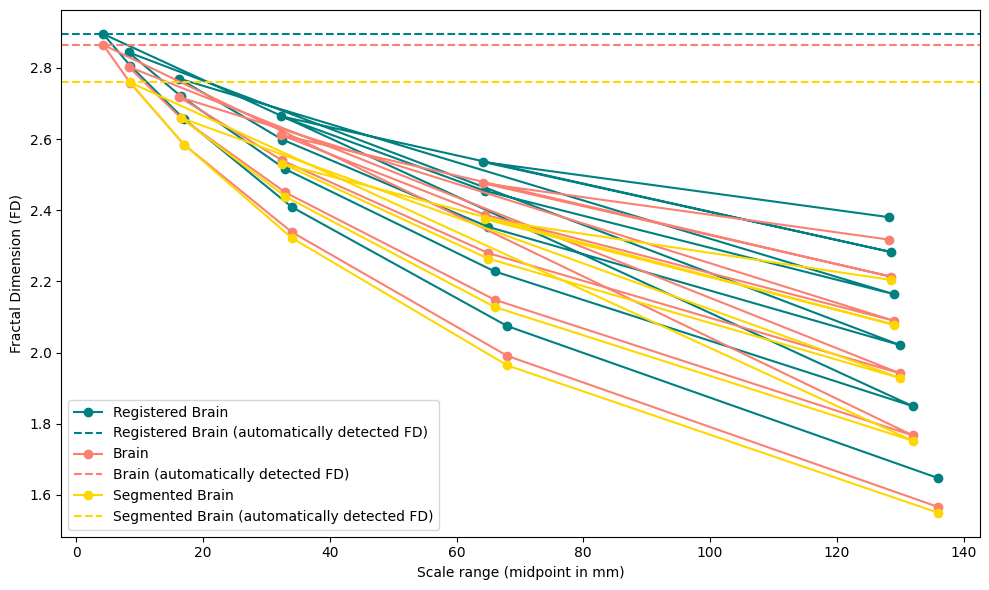

In [27]:
colors = ['teal', 'salmon', 'gold']

plt.figure(figsize=(10, 6))

# Loop with index to assign colours
for idx, file in enumerate(df_fd['description'].unique()):
    subset = df_fd[df_fd['description'] == file]
    x = (subset['scale_min'] + subset['scale_max']) / 2
    y = subset['fd_local']  # Per-scale FD

    color = colors[idx % len(colors)]  # In case there are more than 3 files

    # Plot per-scale FD line with points
    plt.plot(x, y, marker='o', color=color, label=file)

    # Plot global FD line in same colour, dashed
    global_fd = subset['FD'].iloc[0]
    plt.axhline(global_fd, linestyle='--', color=color, label=f"{file} (automatically detected FD)")

plt.xlabel('Scale range (midpoint in mm)')
plt.ylabel('Fractal Dimension (FD)')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()



## Porespy

In [12]:
results = []
for file in files:
    img = nib.load(file)
    data = img.get_fdata()

    # Convert to binary image (porespy expects boolean arrays)
    binary_data = data > 0
    scales = [1,2,4,8,16,32,64,128,256]
    result = ps.metrics.boxcount(binary_data, bins=scales)
    results.append(result)

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

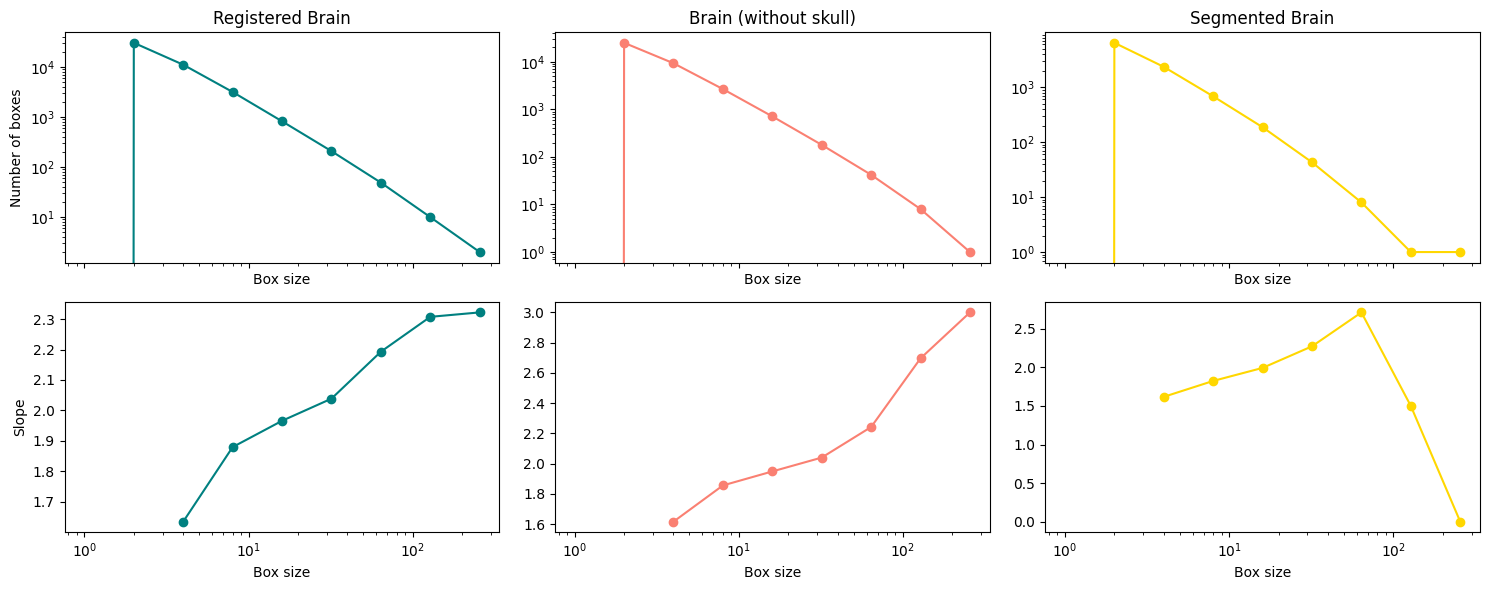

In [15]:
colors = ['teal', 'salmon', 'gold']
titles = ['Registered Brain', 'Brain (without skull)', 'Segmented Brain']

# Create figure and axes
fig, axes = plt.subplots(2, 3, figsize=(15, 6), sharex='col')

# Loop over each result and corresponding axes
for idx, (result, title, color) in enumerate(zip(results, titles, colors)):
    # Top row: box count
    ax1 = axes[0, idx]
    ax1.set_title(title)
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.plot(result.size, result.count, '-o', color=color)
    if idx == 0:
        ax1.set_ylabel('Number of boxes')
    ax1.set_xlabel('Box size')

    # Bottom row: slope
    ax2 = axes[1, idx]
    ax2.set_xscale('log')
    ax2.plot(result.size, result.slope, '-o', color=color)
    if idx == 0:
        ax2.set_ylabel('Slope')
    ax2.set_xlabel('Box size')

# Adjust layout
plt.tight_layout()
plt.show()

Use of porespy without predefining the box sizes.

In [21]:
results2 = []
for file in files:
    img = nib.load(file)
    data = img.get_fdata()

    # Convert to binary image (porespy expects boolean arrays)
    binary_data = data > 0
    result = ps.metrics.boxcount(binary_data, bins=20)
    results2.append(result)

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

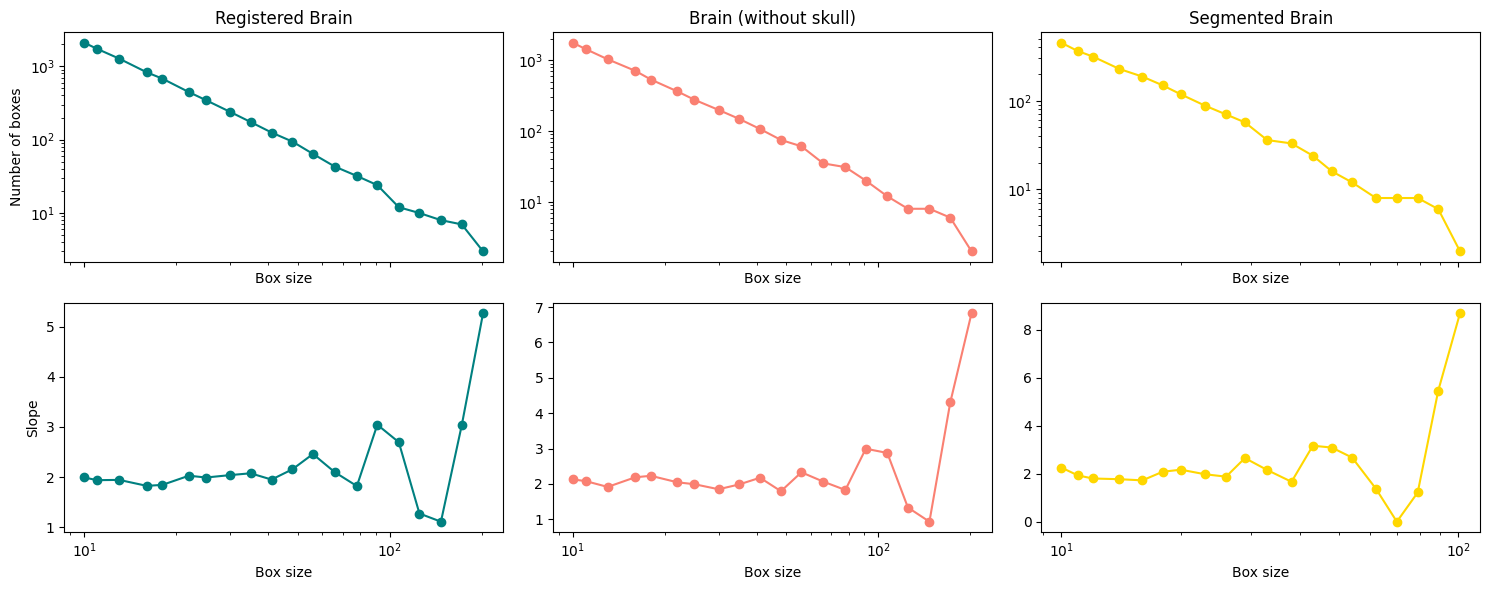

In [22]:
colors = ['teal', 'salmon', 'gold']
titles = ['Registered Brain', 'Brain (without skull)', 'Segmented Brain']

# Create figure and axes
fig, axes = plt.subplots(2, 3, figsize=(15, 6), sharex='col')

# Loop over each result and corresponding axes
for idx, (result, title, color) in enumerate(zip(results2, titles, colors)):
    # Top row: box count
    ax1 = axes[0, idx]
    ax1.set_title(title)
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.plot(result.size, result.count, '-o', color=color)
    if idx == 0:
        ax1.set_ylabel('Number of boxes')
    ax1.set_xlabel('Box size')

    # Bottom row: slope
    ax2 = axes[1, idx]
    ax2.set_xscale('log')
    ax2.plot(result.size, result.slope, '-o', color=color)
    if idx == 0:
        ax2.set_ylabel('Slope')
    ax2.set_xlabel('Box size')

# Adjust layout
plt.tight_layout()
plt.show()

In [23]:
for result in results2:
    print('box sized:', result.size)
    # print('box count:', result.count)
    print('slope:', result.slope)
    print('FD:', result.slope[:10].mean())

box sized: [ 10  11  13  16  18  22  25  30  35  41  48  56  66  78  91 107 125 147
 172 202]
slope: [1.9905619  1.93710236 1.94261217 1.8239173  1.84305228 2.02644277
 1.9899376  2.03813764 2.07450384 1.94898483 2.15477606 2.45825037
 2.09725426 1.81941639 3.04302423 2.6943169  1.272381   1.10913268
 3.03435741 5.27014298]
FD: 1.961525268838234
box sized: [ 10  11  13  16  18  22  25  30  35  41  48  56  66  78  91 107 125 147
 172 202]
slope: [2.12526001 2.08008011 1.9139165  2.18666772 2.22892211 2.04419861
 1.99097943 1.84815271 1.98350832 2.17365182 1.79221469 2.32819206
 2.06481031 1.82726595 2.99459193 2.87521641 1.33110756 0.93033383
 4.30327398 6.83330398]
FD: 2.0575337344085023
box sized: [ 10  11  12  14  16  18  20  23  26  29  33  38  43  48  54  62  70  79
  89 101]
slope: [ 2.25416371  1.92788662  1.79844282  1.76875744  1.72052527  2.07923547
  2.16449613  1.97512384  1.87438013  2.64859496  2.15112537  1.66111957
  3.16344142  3.08548806  2.66911915  1.37253703 -0.    

In [14]:
# Define the limits you want for each file
scale_limits = [
    8,   # For first file
    8,   # For second file
    16   # For third file
]

# Iterate over results and scale limits
global_fds = []

for idx, (result, limit) in enumerate(zip(results, scale_limits)):
    # Create mask for desired scales
    mask = result.size <= limit

    # Compute mean slope (global FD) over the desired scale range
    global_fd = np.nanmean(result.slope[mask])

    global_fds.append(global_fd)

# Print the results
for idx, fd in enumerate(global_fds):
    print(f"File {idx + 1}: Global FD = {fd:.4f}")


File 1: Global FD = -inf
File 2: Global FD = -inf
File 3: Global FD = -inf


In [9]:
def get_manual_scales(image_shape):
    L_Max = max(image_shape)
    stop = int(np.ceil(np.log2(L_Max)))
    scales = [2 ** exp for exp in range(stop + 1)]
    return scales

def get_stable_box_sizes(fd_results, threshold=0.1):
    """
    Computes the rolling standard deviation of the slope
    and returns the box sizes where the slope is stable.
    """
    rolling_std = pd.Series(fd_results.slope).rolling(window=3).std()

    # Get indices where slope is stable
    stable_indices = np.where(rolling_std < threshold)[0]

    if len(stable_indices) == 0:
        # Fallback: if no stable region is found, use all sizes
        return fd_results.size

    # Corresponding box sizes
    stable_box_sizes = fd_results.size[:stable_indices[-1] + 1]

    return stable_box_sizes

def porespy_boxcount_from_file(file_path, description=None):
    # Auto description from file name if not provided
    if description is None:
        description = file_path.split('/')[-1].replace('.nii.gz', '').replace('_', ' ').title()

    # Load image
    img = nib.load(file_path)
    data = img.get_fdata()

    # Convert to binary image (porespy expects boolean arrays)
    binary_data = data > 0

    # Generate manual scales
    scales = get_manual_scales(img.shape)

    # Run PoreSpy boxcounting
    result = ps.metrics.boxcount(binary_data, bins=scales)

    # Prepare fd_results list
    fd_results = []
    for size, count, slope in zip(result.size, result.count, result.slope):
        fd_results.append({
            'FD': slope,
            'scale_min': size,
            'scale_max': size,
        })

    stable_box_sizes = get_stable_box_sizes(result, threshold=0.1)
    mask = result.size <= stable_box_sizes[-1]

    # Calculate mean of slopes where mask is True
    global_fd = np.nanmean(result.slope[mask])

    # Min and max box sizes from stable range
    min_box_size = stable_box_sizes[0]
    max_box_size = stable_box_sizes[-1]

    # Create DataFrame
    df_result = pd.DataFrame([{
        'file': file_path,
        'description': description,
        'FD': round(global_fd, 4),
        'min_box_size': min_box_size,
        'max_box_size': max_box_size,
        'fd_results': fd_results
    }])

    return df_result


In [10]:
df_list = []

for file_path in files:
    df = porespy_boxcount_from_file(file_path)
    df_list.append(df)

df_porespy_results = pd.concat(df_list, ignore_index=True)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

In [11]:
df_porespy_results

,file,description,FD,min_box_size,max_box_size,fd_results
0,sample/registered_0.nii.gz,Registered 0,-inf,1,32,"[{'FD': -inf, 'scale_min': 1, 'scale_max': 1},..."
1,sample/brain_0.nii.gz,Brain 0,-inf,1,32,"[{'FD': -inf, 'scale_min': 1, 'scale_max': 1},..."
2,sample/segmented_0.nii.gz,Segmented 0,-inf,1,256,"[{'FD': -inf, 'scale_min': 1, 'scale_max': 1},..."


In [ ]:
df_exploded = df_porespy_results.explode('fd_results')
fd_details = pd.json_normalize(df_exploded['fd_results'])
df_porespy = pd.concat([df_exploded.reset_index(drop=True).drop(columns=['fd_results']), fd_details], axis=1)

# For plotting, group by description (Registered Brain, Brain, Segmented Brain)
grouped = df_porespy.groupby('description')
